In [2]:
import pandas as pd
import numpy as np
import glob
import os

df = pd.concat(
    map(pd.read_csv, glob.glob(os.path.join("../Datasets/","*.csv" ))), ignore_index= True)
df


,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,13/08/16,Burnley,Swansea,0,1,A,0,0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E0,13/08/16,Crystal Palace,West Brom,0,1,A,0,0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E0,13/08/16,Everton,Tottenham,1,1,D,1,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E0,13/08/16,Hull,Leicester,2,1,H,1,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E0,13/08/16,Man City,Sunderland,2,1,H,1,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2655,E0,28/05/2023,Everton,Bournemouth,1,0,H,0,0,D,...,2.14,-1.00,2.02,1.77,2.10,1.81,2.17,1.92,2.03,1.83
2656,E0,28/05/2023,Leeds,Tottenham,1,4,A,0,1,A,...,2.50,0.25,1.84,2.06,1.83,2.10,1.90,2.14,1.81,2.06
2657,E0,28/05/2023,Leicester,West Ham,2,1,H,1,0,H,...,2.51,-0.25,1.75,2.05,1.85,2.06,1.90,2.16,1.82,2.04
2658,E0,28/05/2023,Man United,Fulham,2,1,H,1,1,D,...,2.95,-1.25,1.98,1.92,1.98,1.93,2.07,1.98,1.97,1.89


In [3]:
# To save merged dataframe, along with column name changes
# First change all column names, then save merged dataframe
# merged_df.to_csv('path/to/save/your/merged_data.csv', index=False)

In [4]:
df.rename(columns={'FTHG':'FTHomeGoals','FTAG':'FTAwayGoals','FTR':'FTResult','HTR':'HTResult','HTHG':'HTHomeGoals','HTAG':'HTAwayGoals'
                        ,'HS':'HomeShots','AS':'AwayShots','HST':'HomeShotsTarget','HHW':'HomeWoodwork','AHW':'AwayWoodwork',
                        'HC':'HomeCorners','AC':'AwayCorners','HF':'HomeFouls','AF':'AwayFouls','HFKC':'AwayFreekicks'
                        ,'AFKC':'HomeFreekicks','HO':'HomeOffsides','AO':'AwayOffsides','HY':'HomeYellow','AY':'AwayYellow',
                        'HR':'HomeRed','AR':'AwayRed','HBP':'HomeBookingPoints','ABP':'AwayBookingPoints'},inplace=True)



In [5]:
numerical_cols = df.select_dtypes(include=['int', 'float']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Impute missing values for numerical features with mean
for col in numerical_cols:
    mean_value = df[col].mean()
    df[col].fillna(mean_value, inplace=True)

# Impute missing values for categorical features with mode
for col in categorical_cols:
    mode_value = df[col].mode().iloc[0]  # Get the most frequent category
    df[col].fillna(mode_value, inplace=True)

df

,Div,Date,HomeTeam,AwayTeam,FTHomeGoals,FTAwayGoals,FTResult,HTHomeGoals,HTAwayGoals,HTResult,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,13/08/16,Burnley,Swansea,0,1,A,0,0,D,...,2.101803,-0.242105,1.945425,1.959131,1.961428,1.968526,2.015868,2.029276,1.935329,1.947717
1,E0,13/08/16,Crystal Palace,West Brom,0,1,A,0,0,D,...,2.101803,-0.242105,1.945425,1.959131,1.961428,1.968526,2.015868,2.029276,1.935329,1.947717
2,E0,13/08/16,Everton,Tottenham,1,1,D,1,0,H,...,2.101803,-0.242105,1.945425,1.959131,1.961428,1.968526,2.015868,2.029276,1.935329,1.947717
3,E0,13/08/16,Hull,Leicester,2,1,H,1,0,H,...,2.101803,-0.242105,1.945425,1.959131,1.961428,1.968526,2.015868,2.029276,1.935329,1.947717
4,E0,13/08/16,Man City,Sunderland,2,1,H,1,0,H,...,2.101803,-0.242105,1.945425,1.959131,1.961428,1.968526,2.015868,2.029276,1.935329,1.947717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2655,E0,28/05/2023,Everton,Bournemouth,1,0,H,0,0,D,...,2.140000,-1.000000,2.020000,1.770000,2.100000,1.810000,2.170000,1.920000,2.030000,1.830000
2656,E0,28/05/2023,Leeds,Tottenham,1,4,A,0,1,A,...,2.500000,0.250000,1.840000,2.060000,1.830000,2.100000,1.900000,2.140000,1.810000,2.060000
2657,E0,28/05/2023,Leicester,West Ham,2,1,H,1,0,H,...,2.510000,-0.250000,1.750000,2.050000,1.850000,2.060000,1.900000,2.160000,1.820000,2.040000
2658,E0,28/05/2023,Man United,Fulham,2,1,H,1,1,D,...,2.950000,-1.250000,1.980000,1.920000,1.980000,1.930000,2.070000,1.980000,1.970000,1.890000


In [6]:
df.duplicated()


0       False
1       False
2       False
3       False
4       False
        ...  
2655    False
2656    False
2657    False
2658    False
2659    False
Length: 2660, dtype: bool

In [7]:
import matplotlib.pyplot as plt

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# Impute missing values for categorical features with mode
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


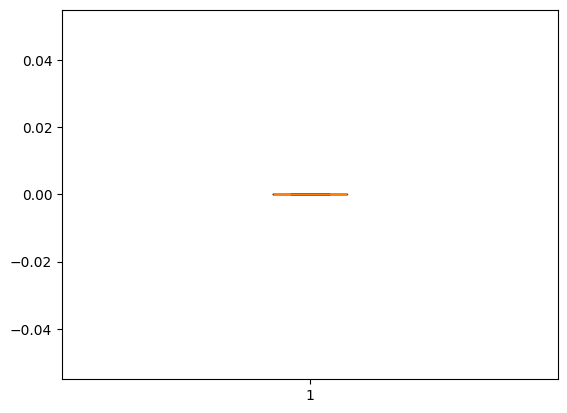

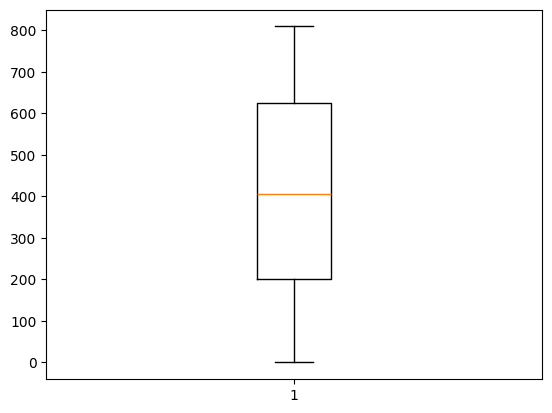

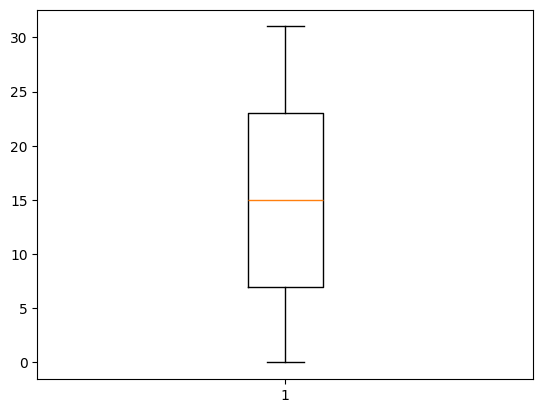

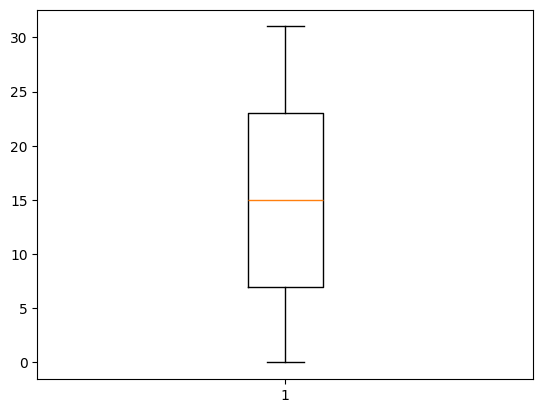

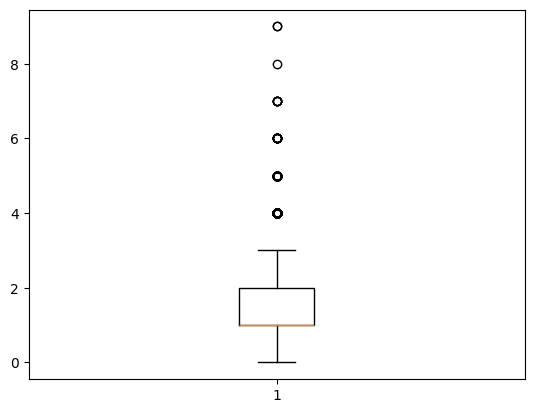

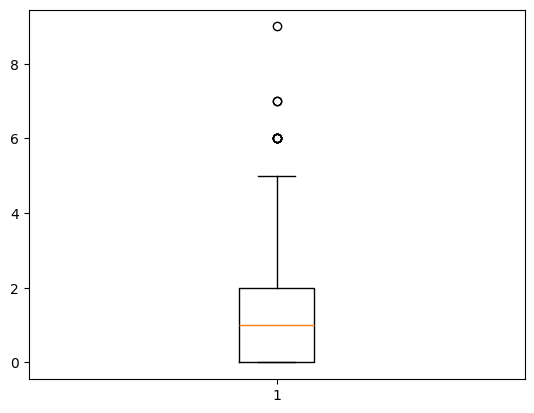

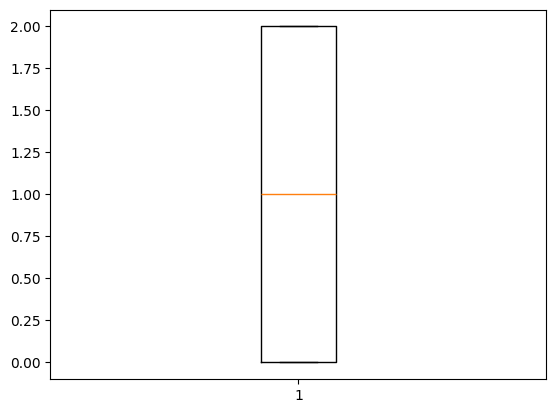

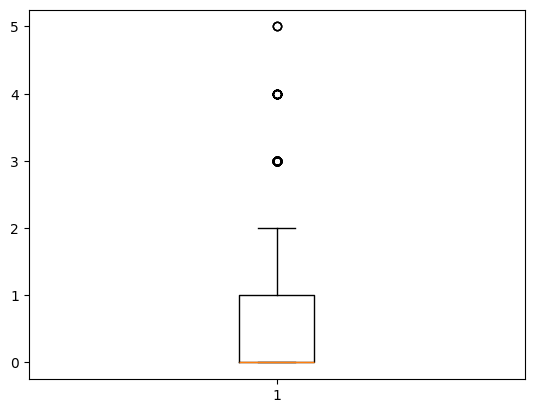

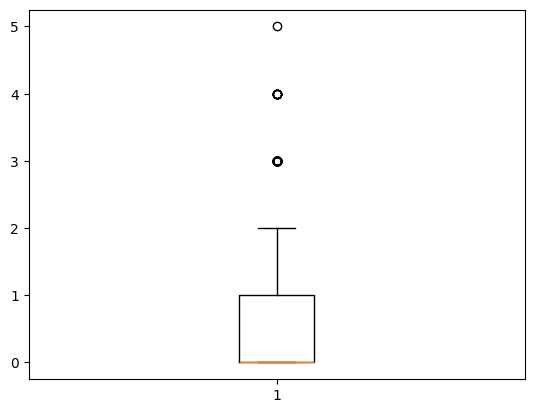

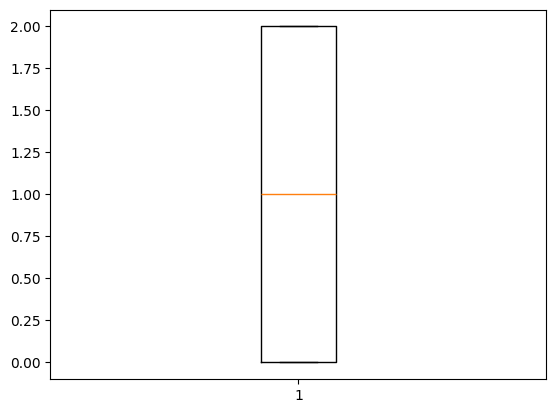

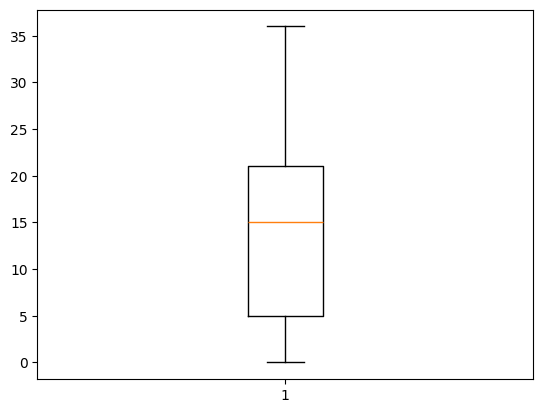

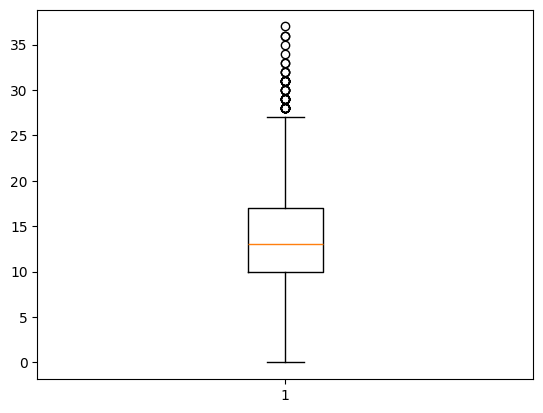

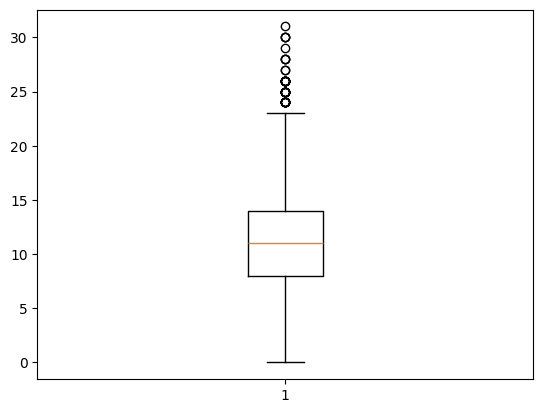

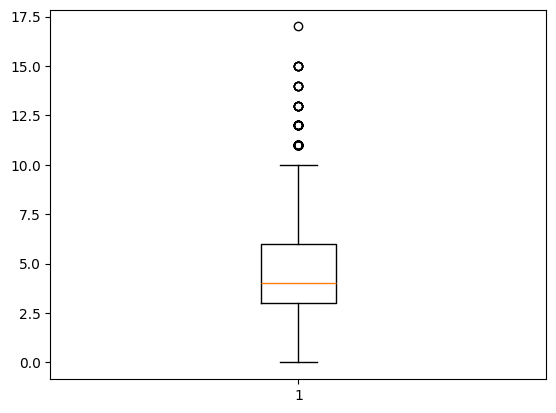

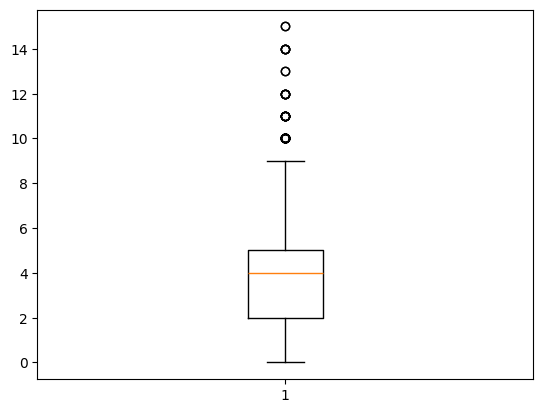

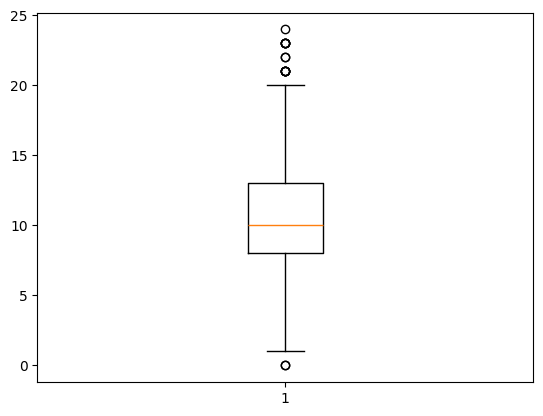

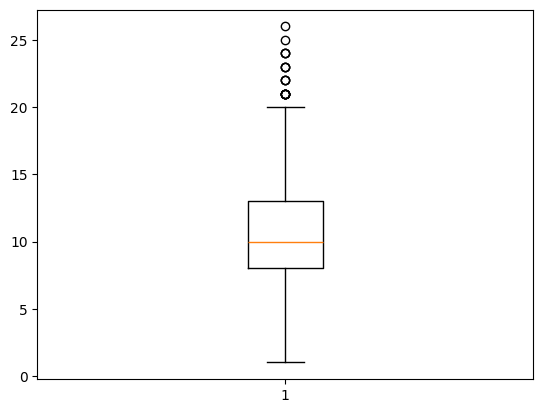

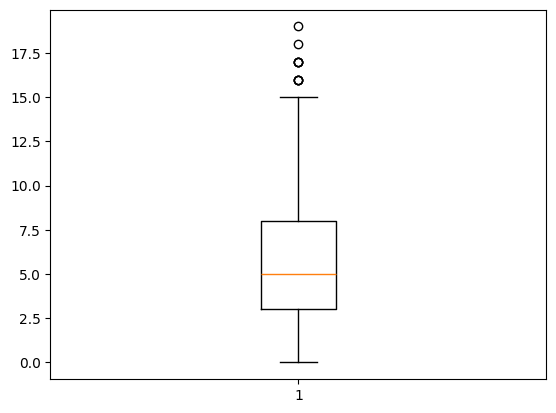

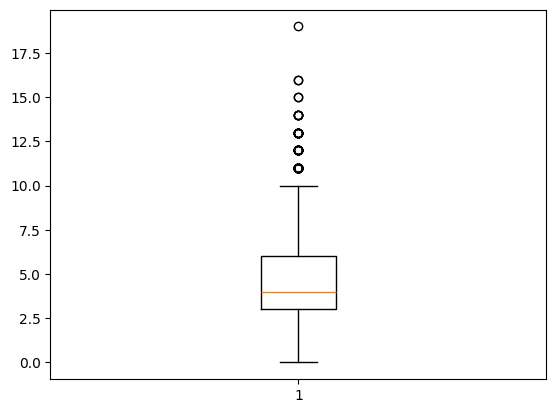

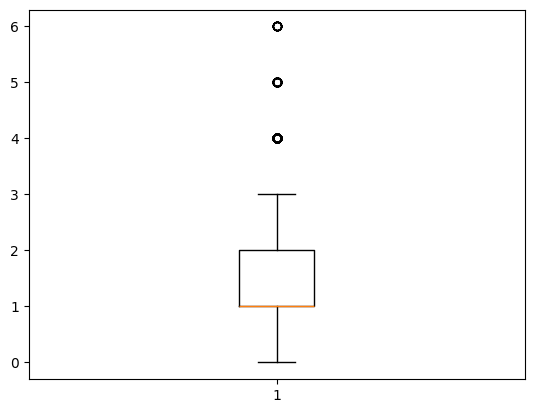

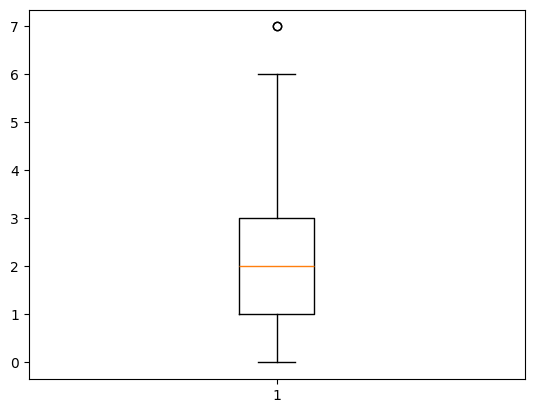

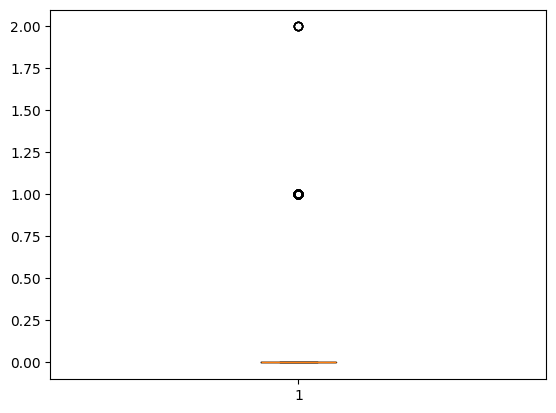

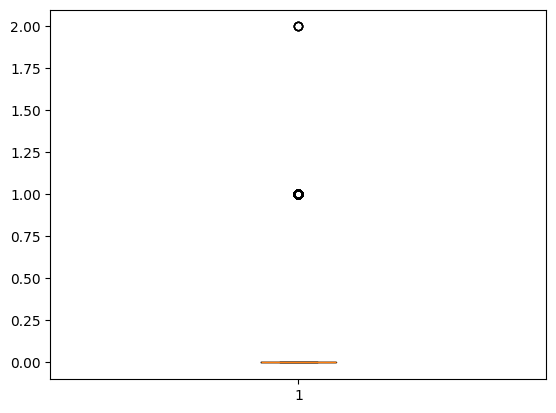

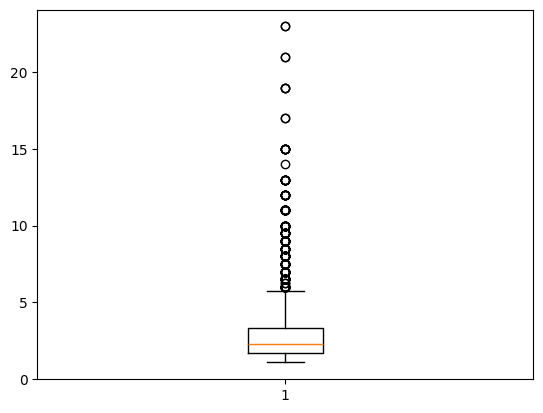

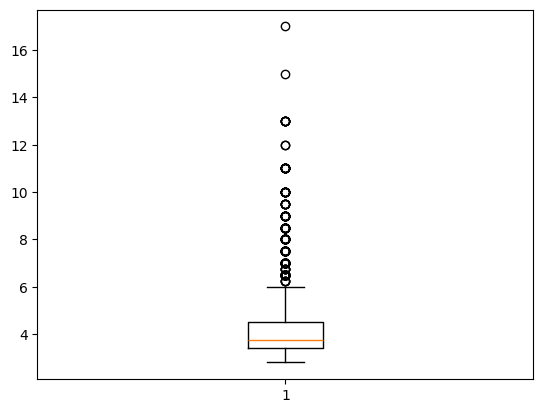

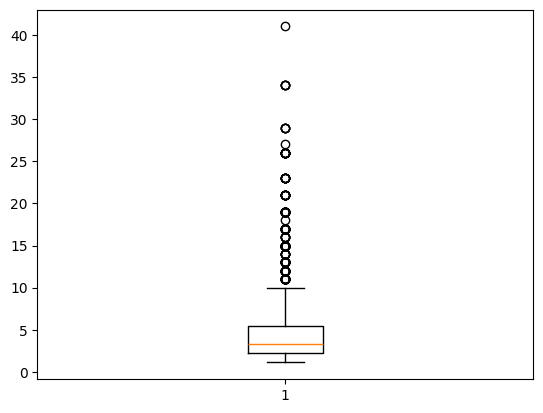

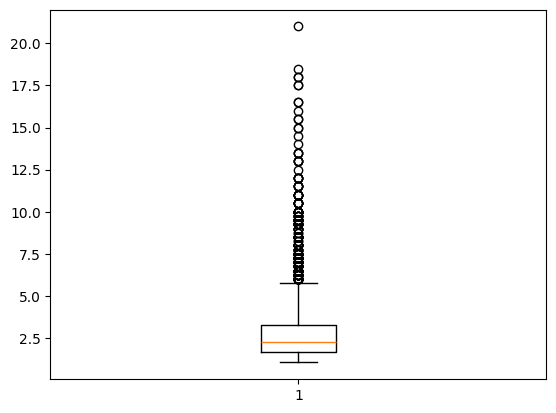

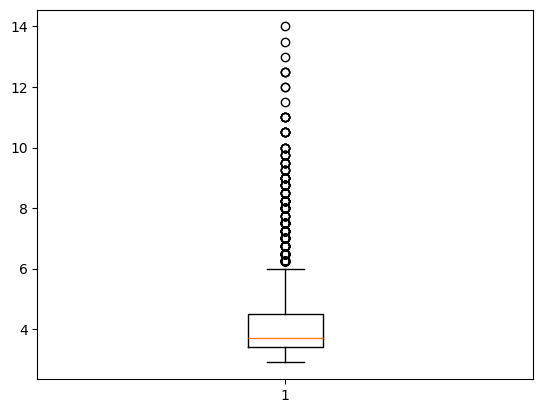

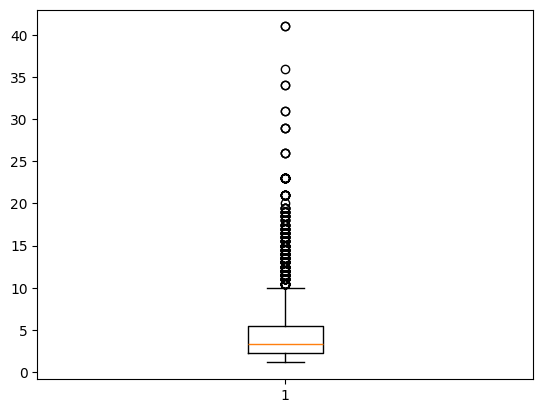

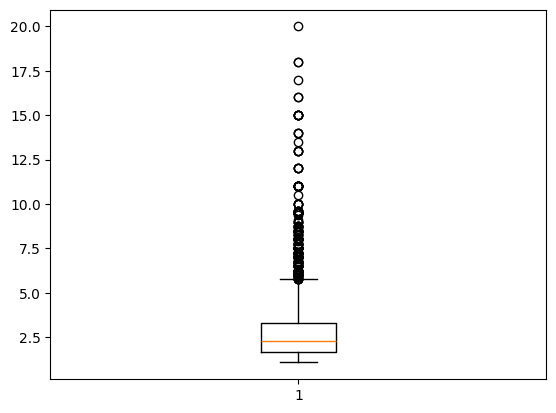

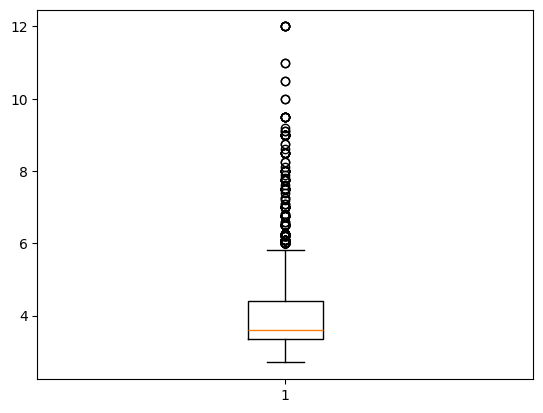

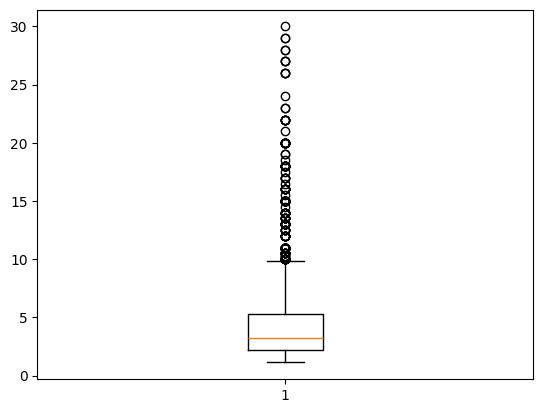

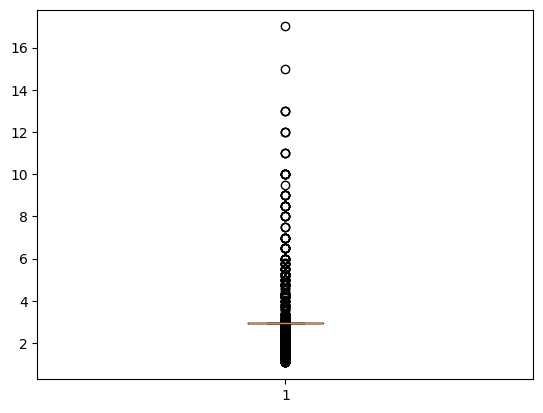

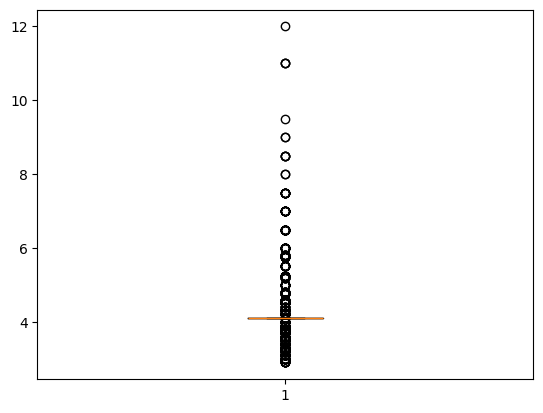

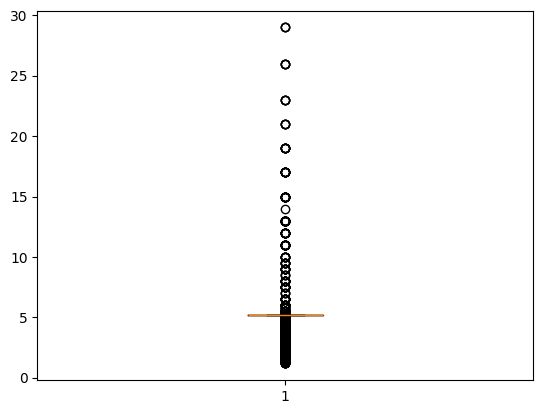

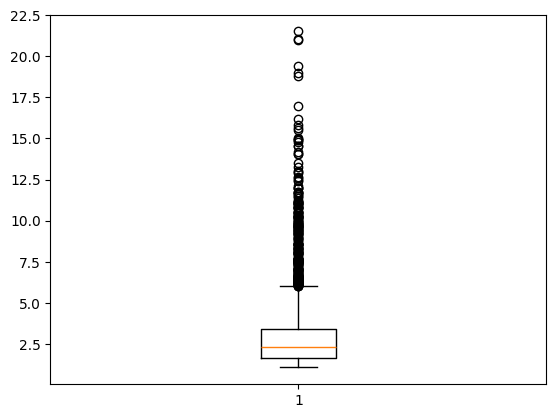

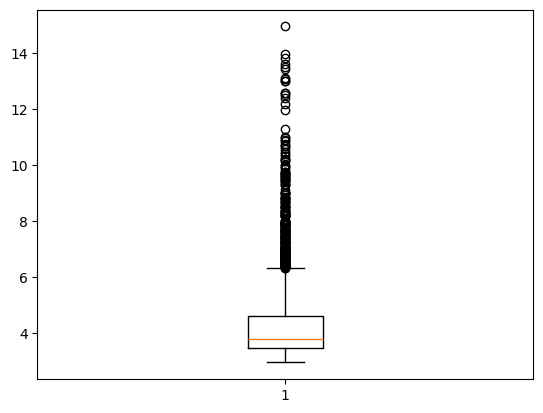

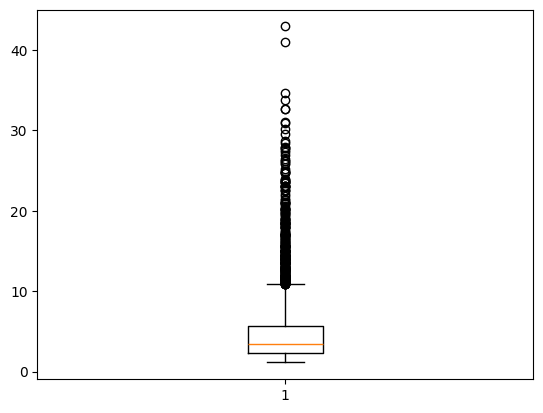

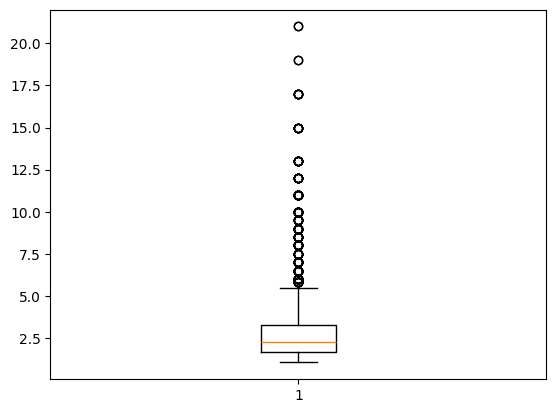

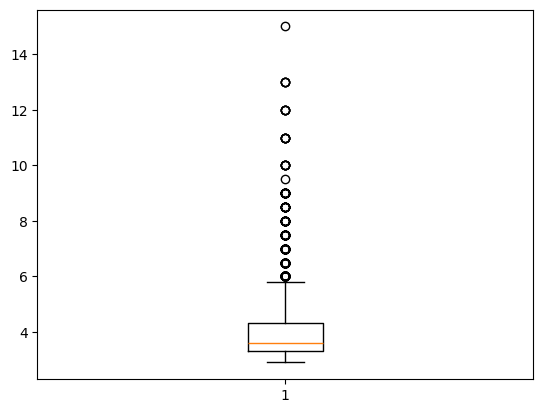

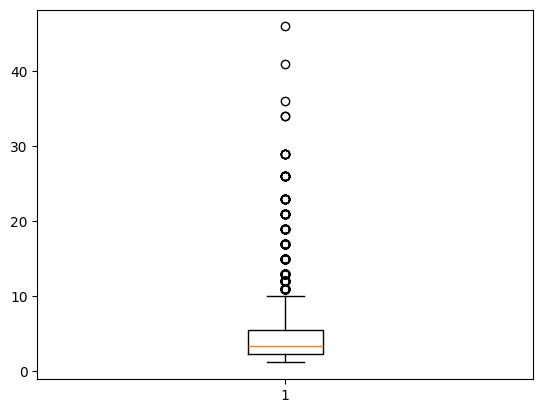

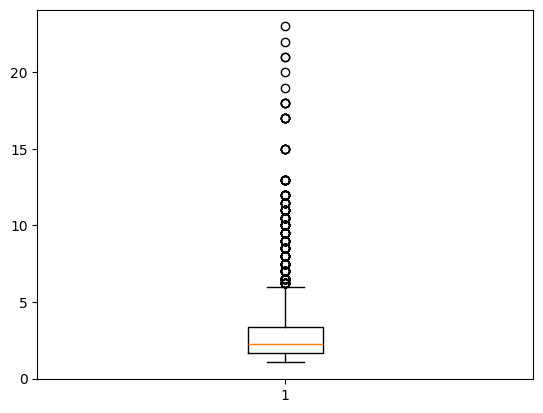

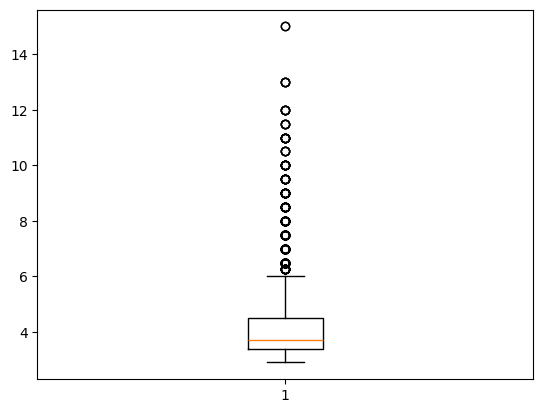

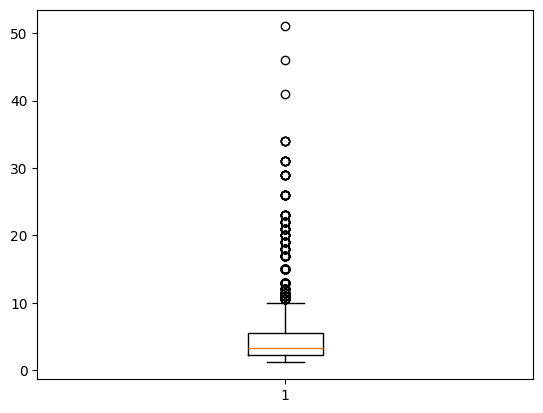

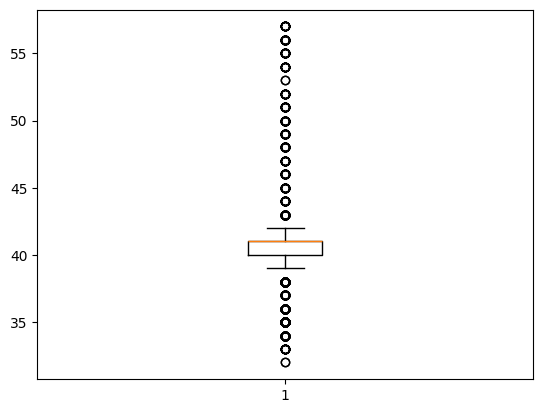

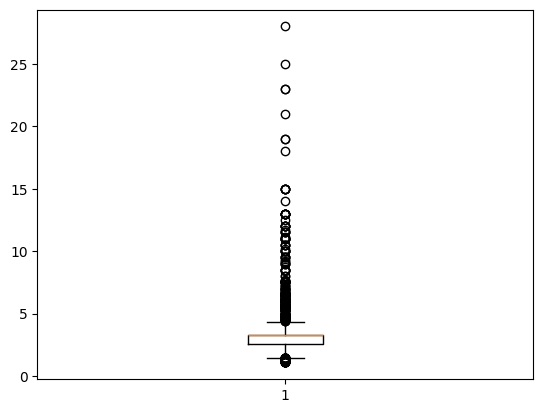

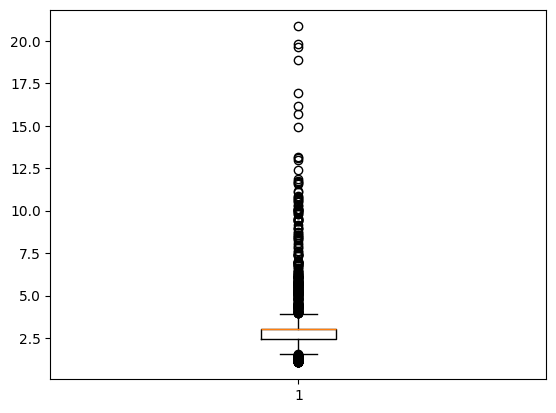

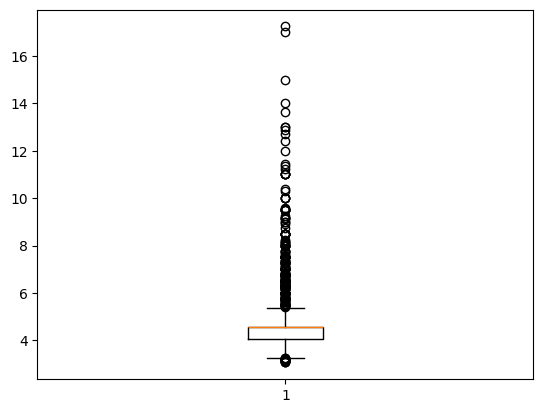

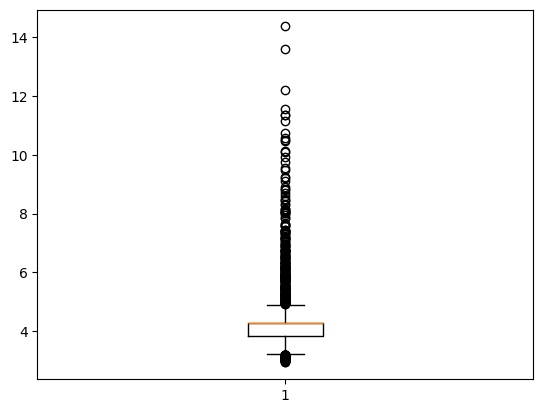

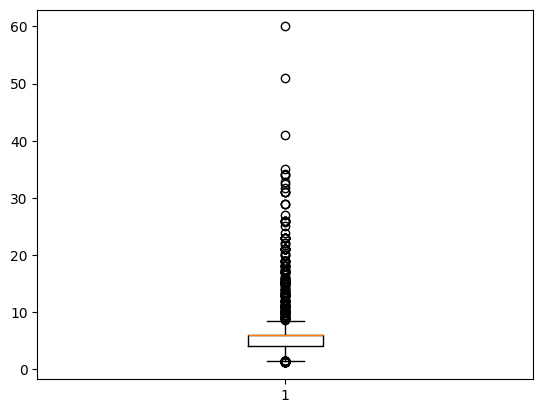

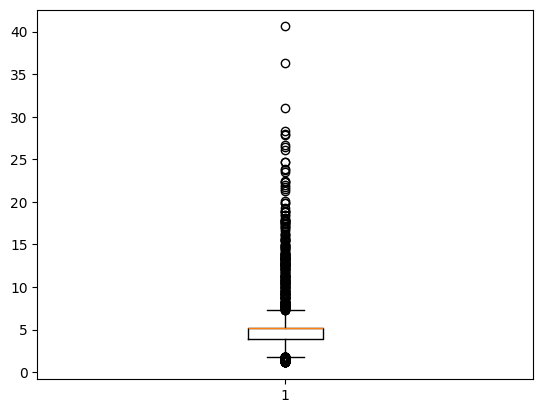

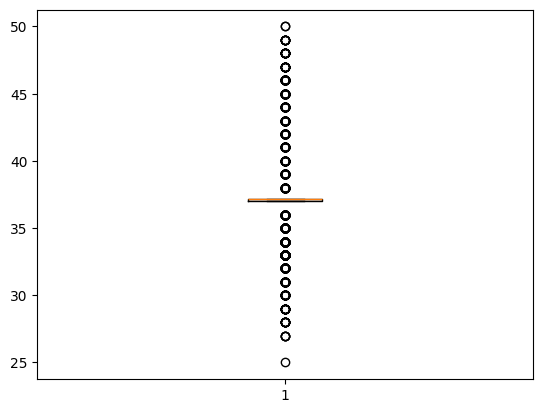

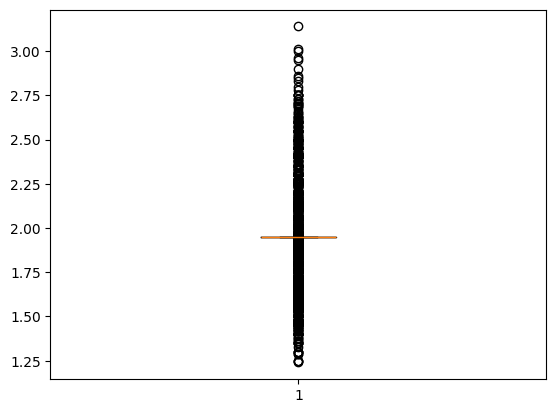

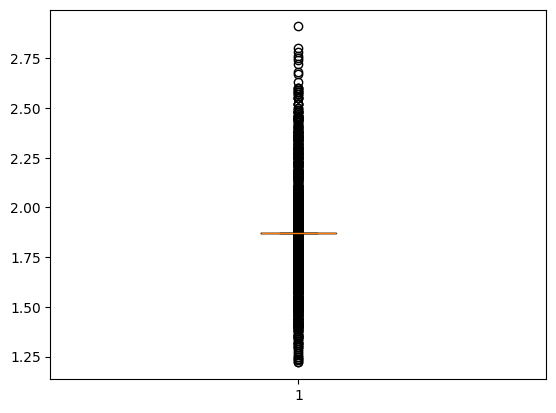

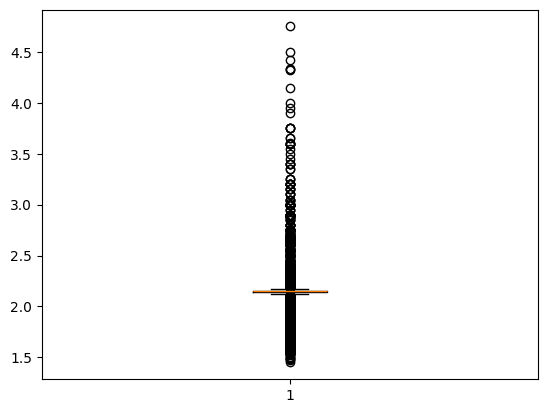

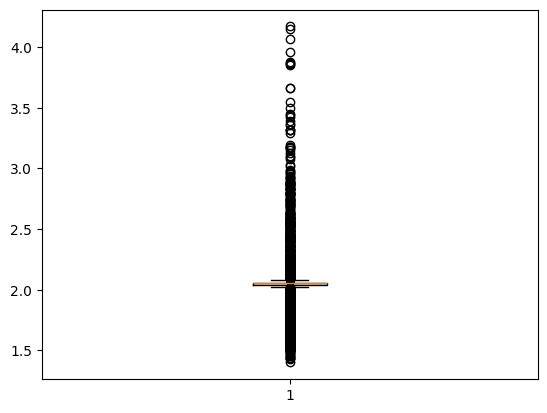

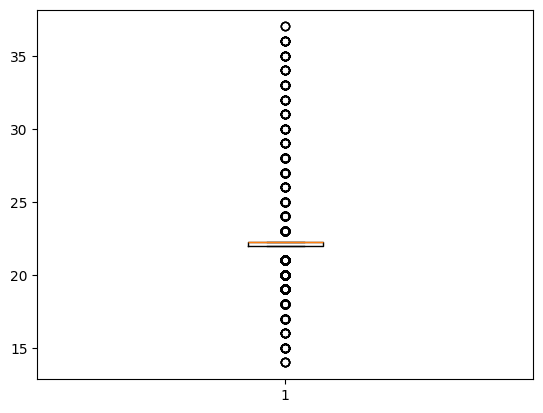

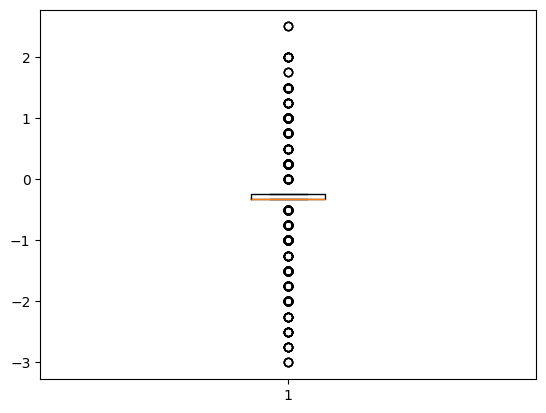

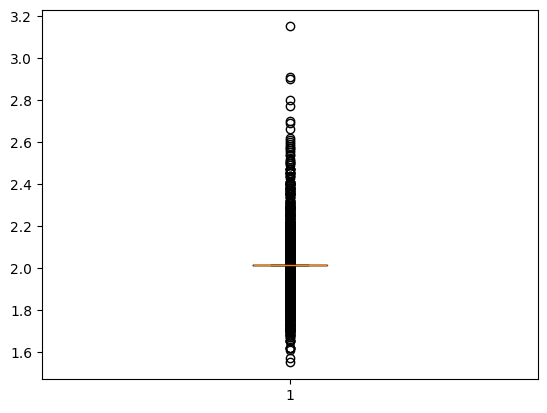

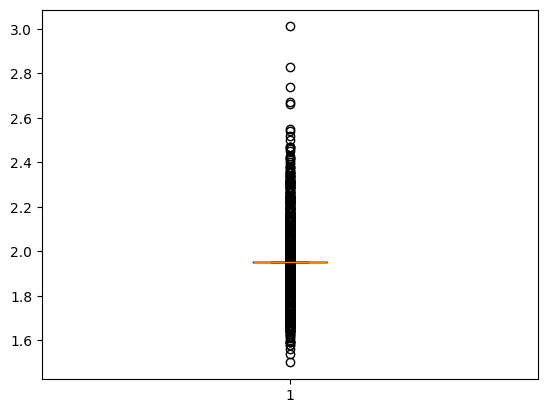

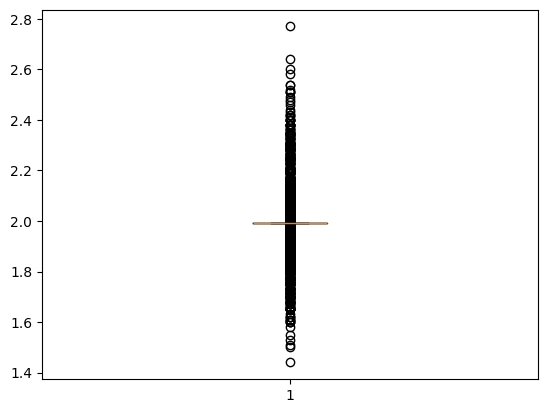

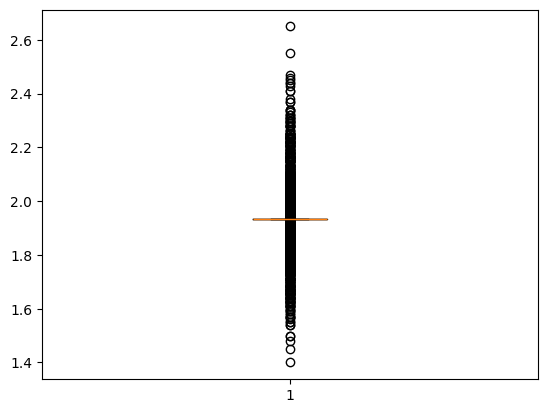

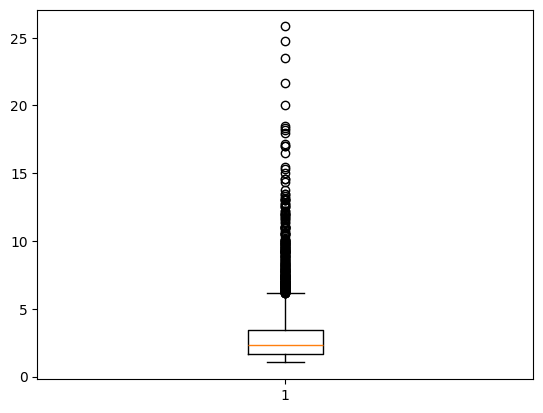

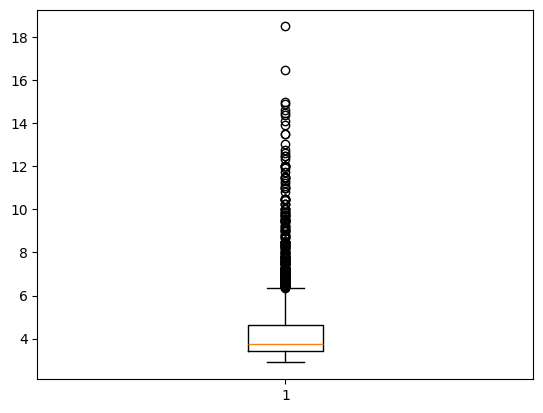

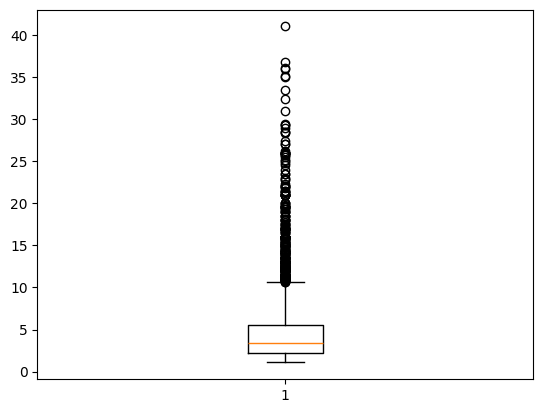

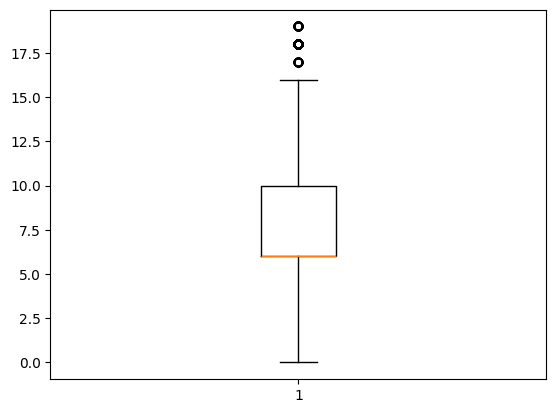

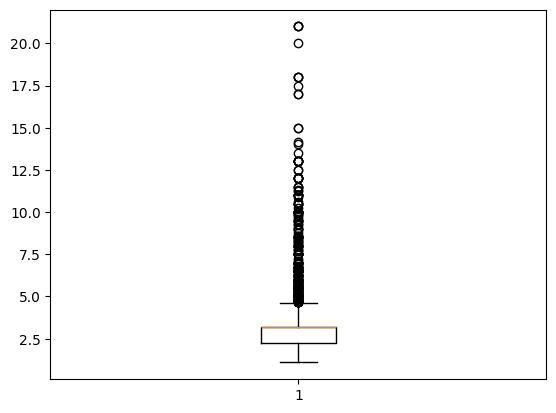

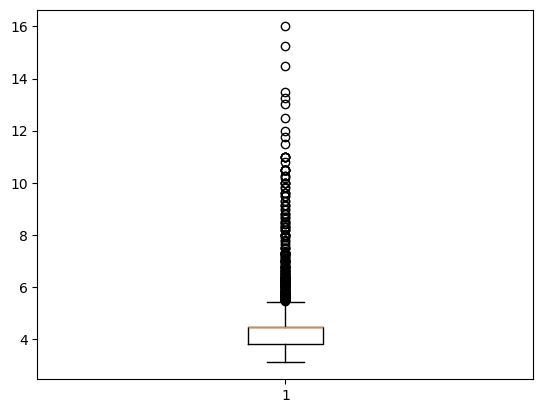

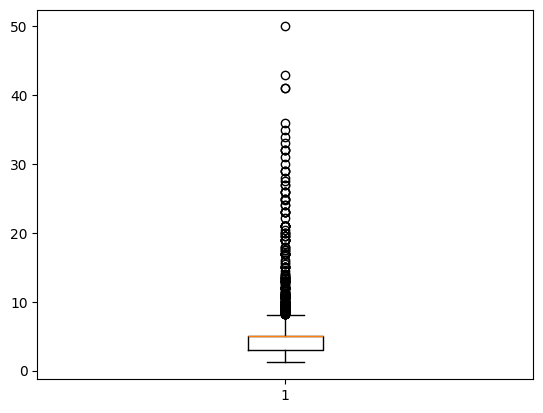

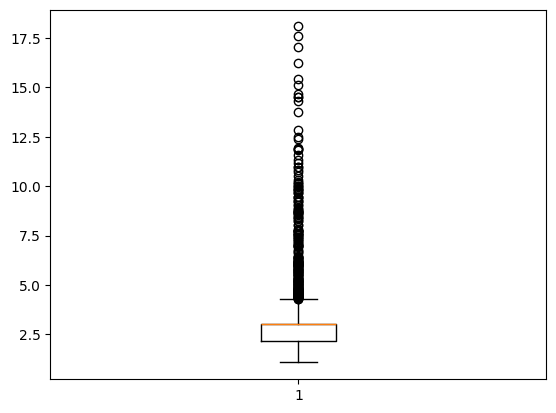

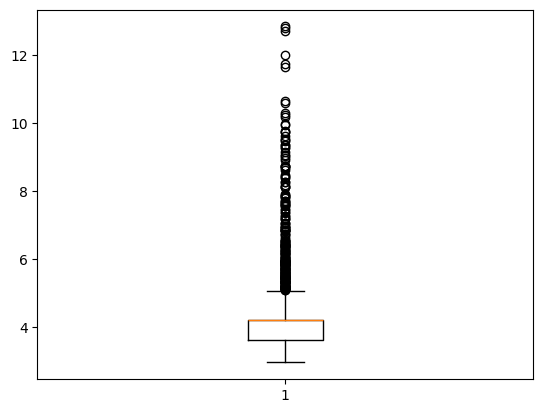

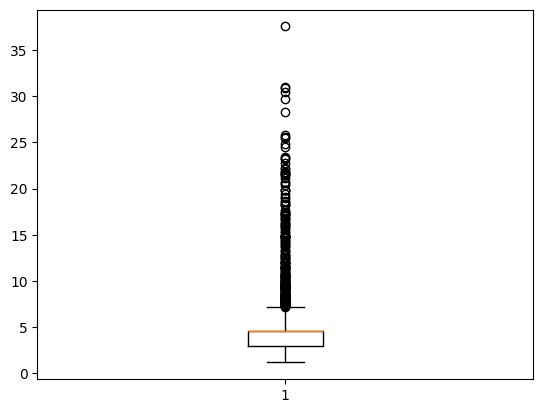

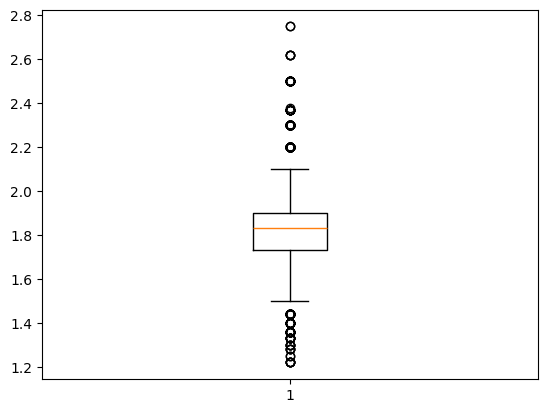

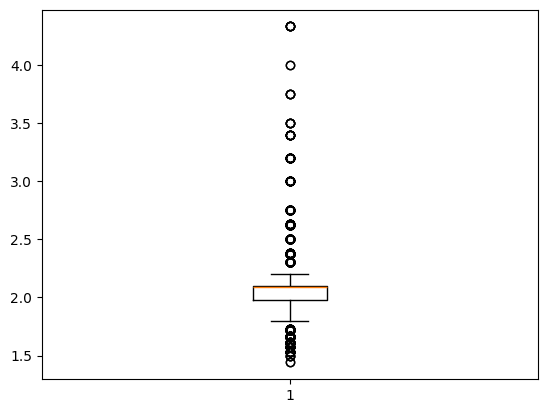

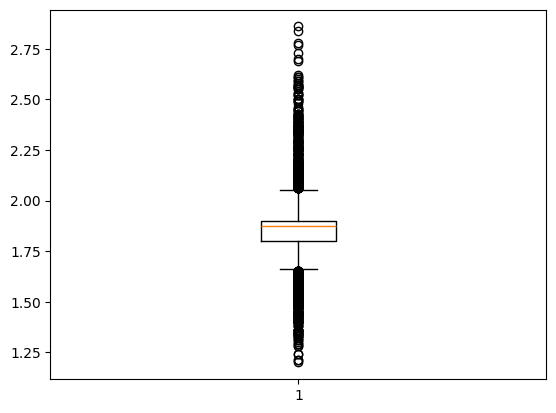

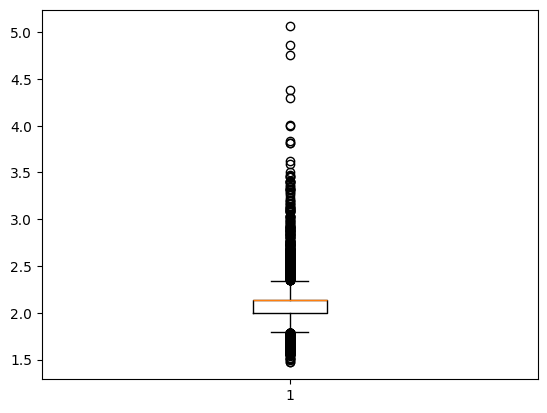

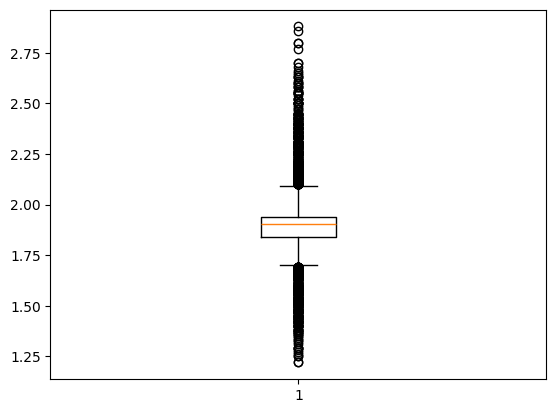

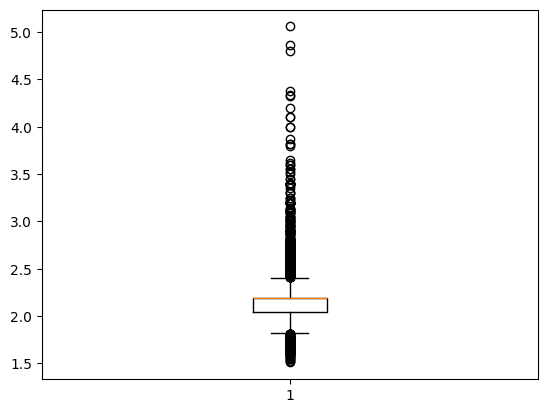

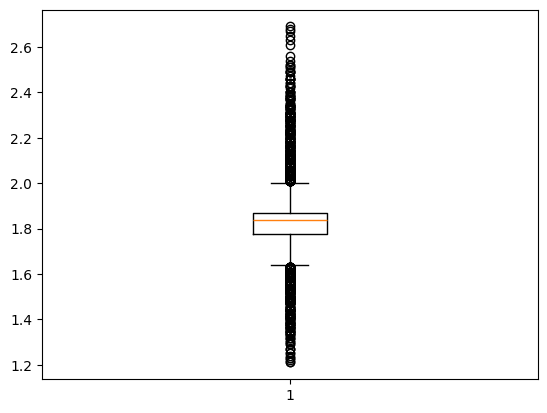

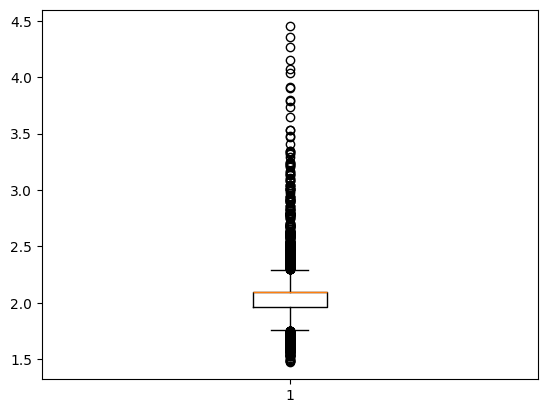

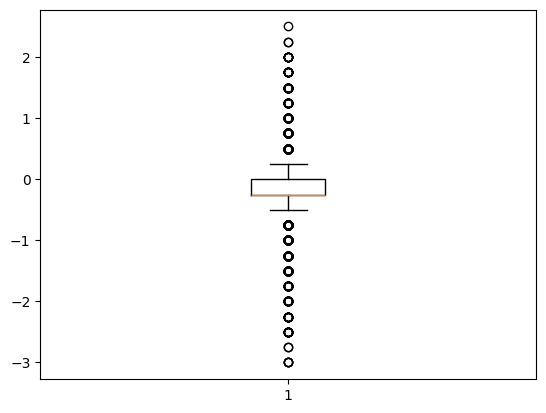

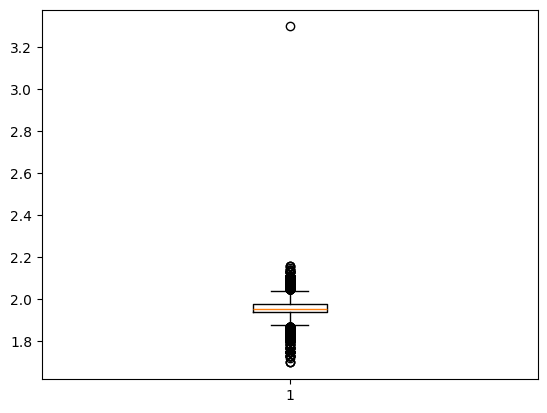

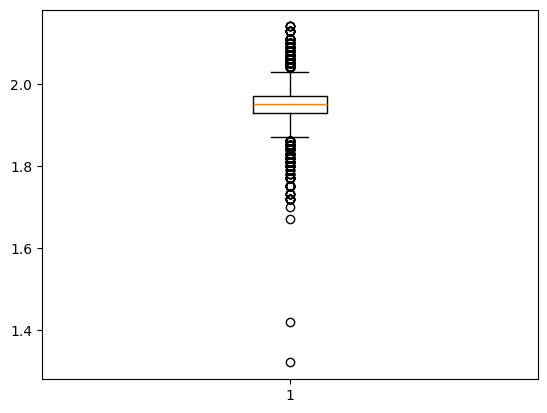

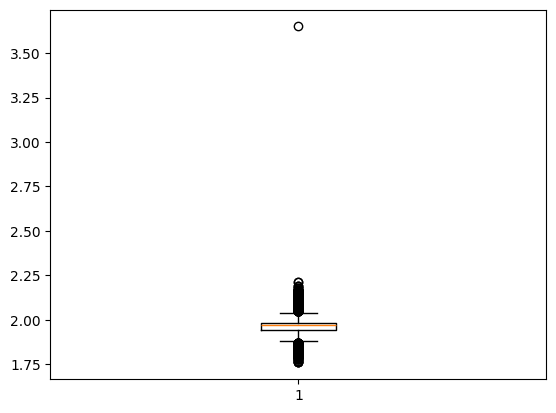

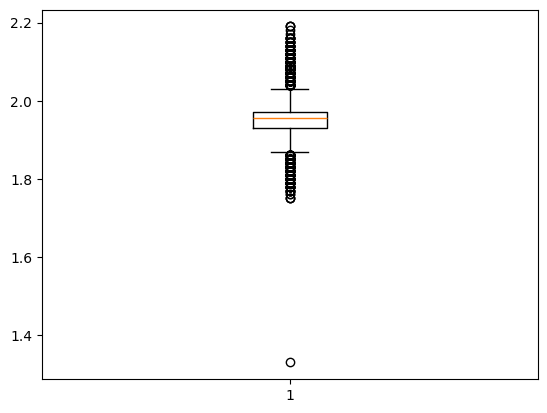

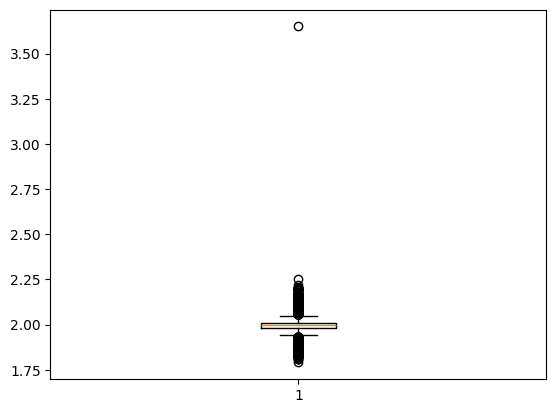

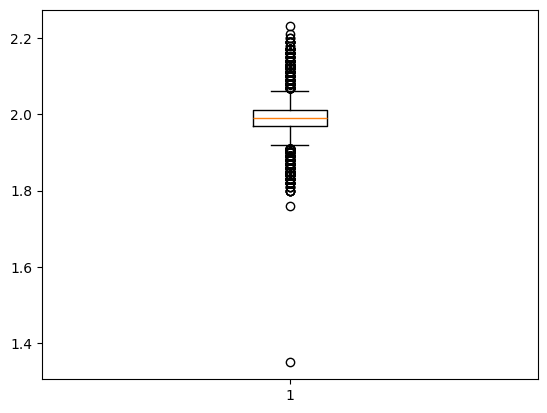

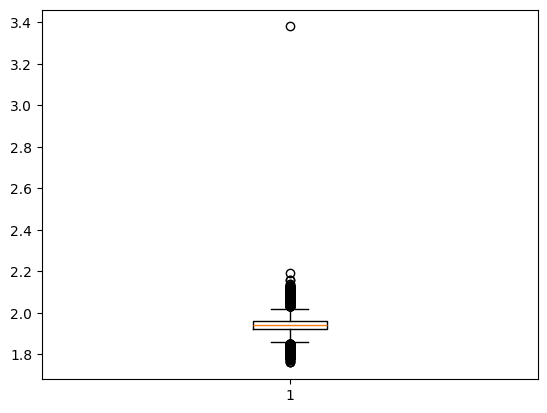

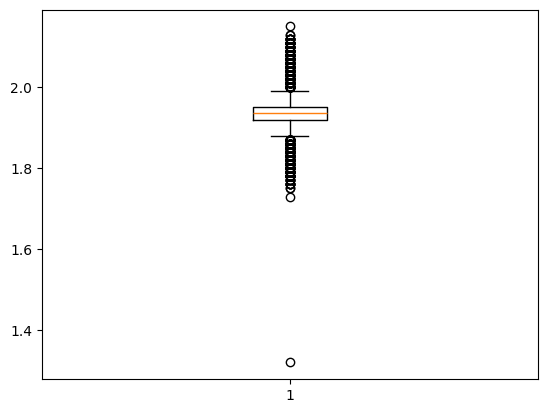

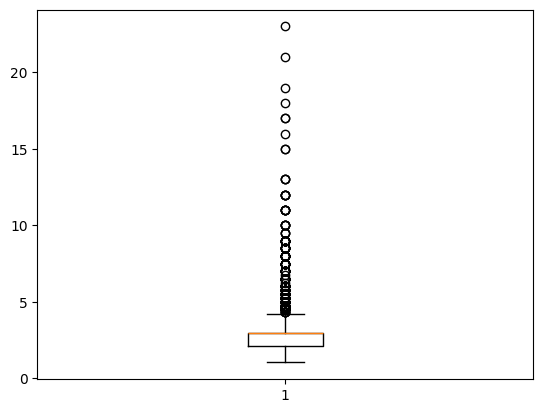

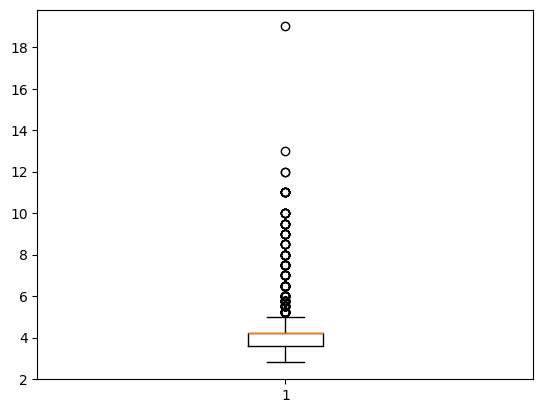

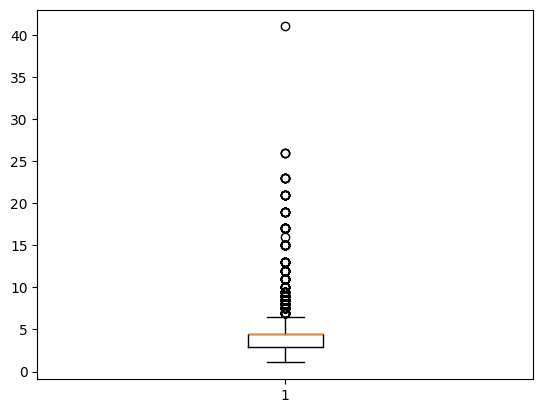

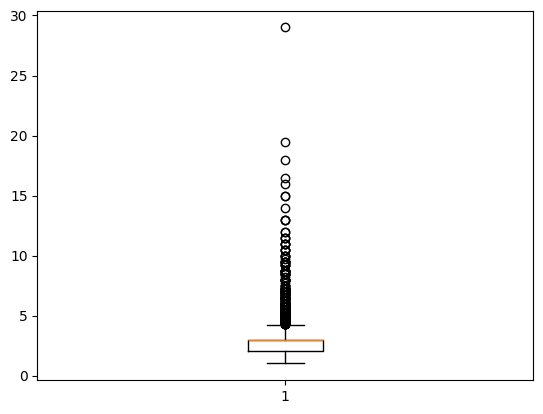

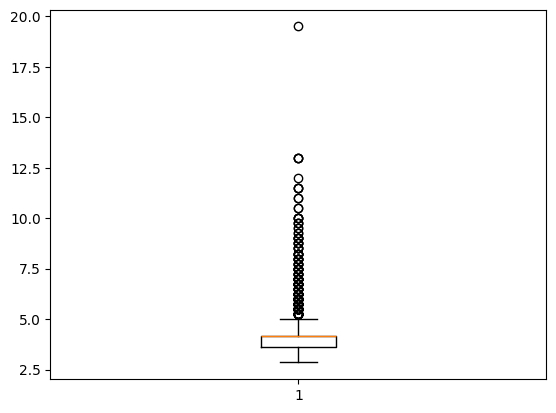

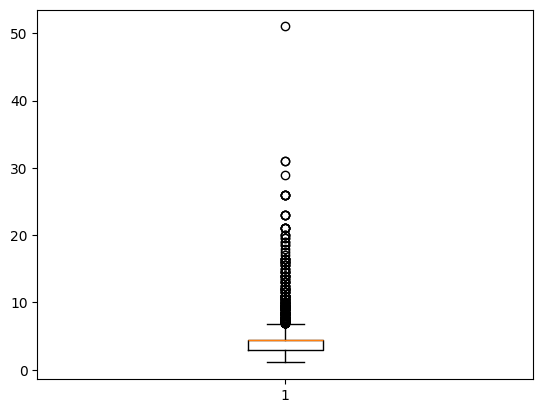

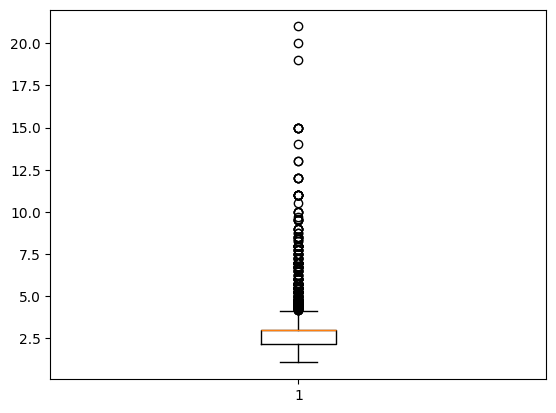

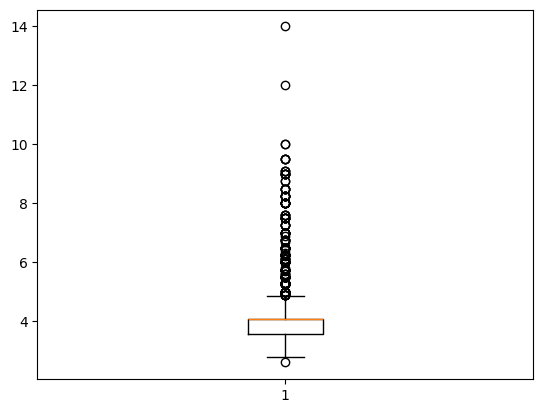

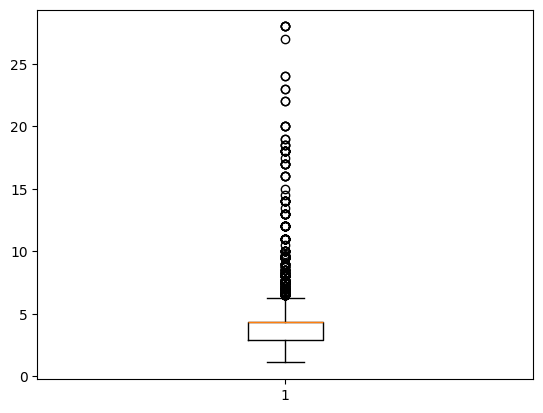

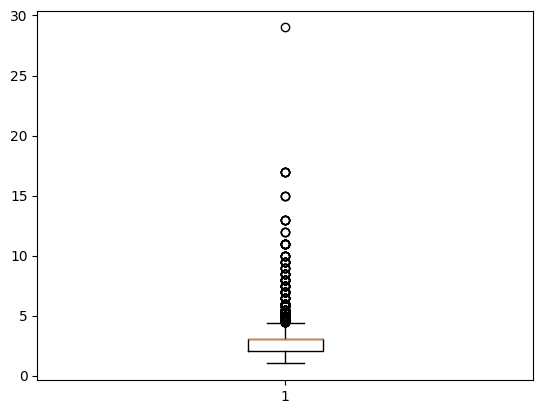

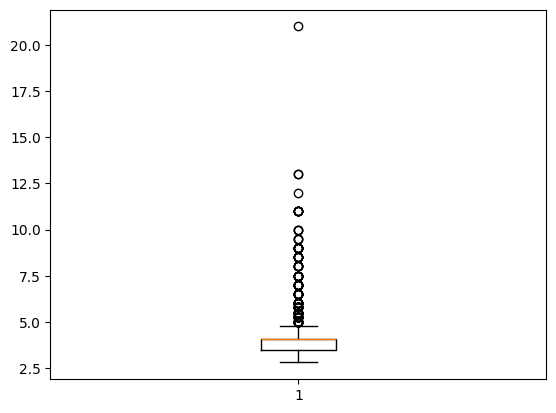

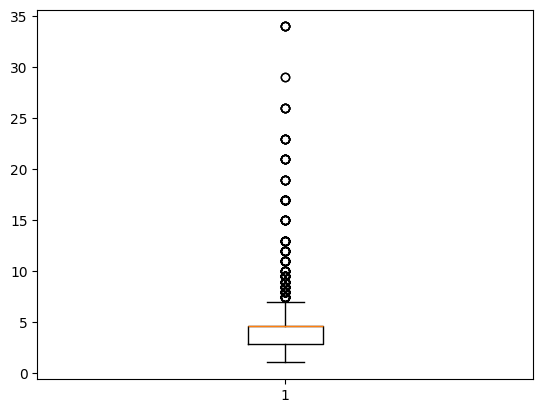

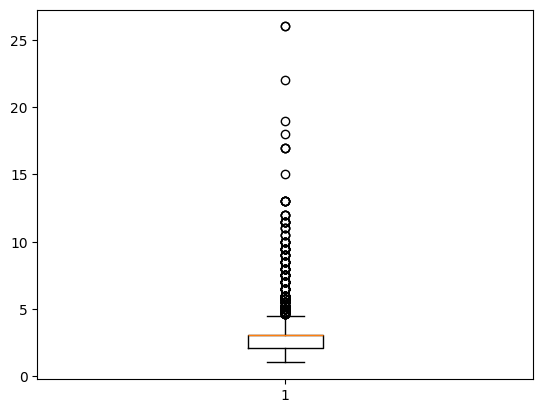

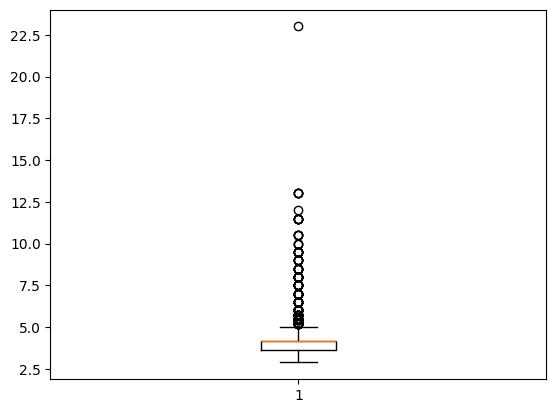

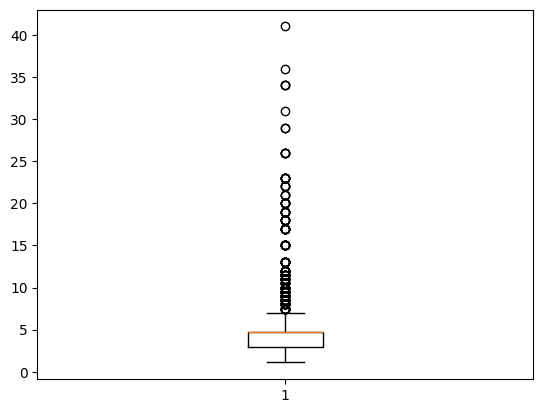

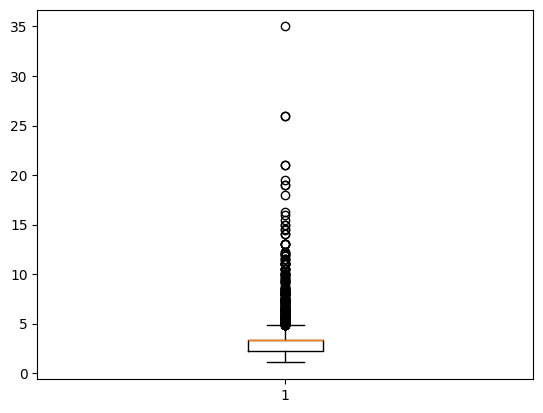

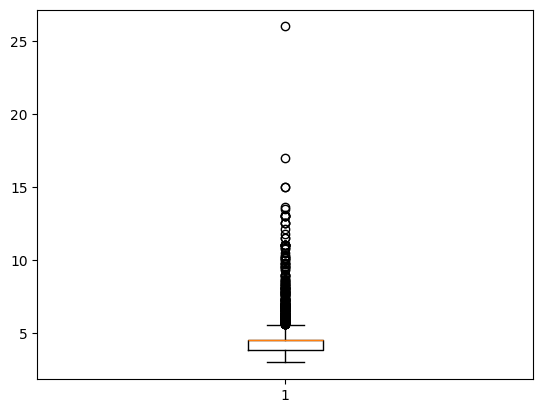

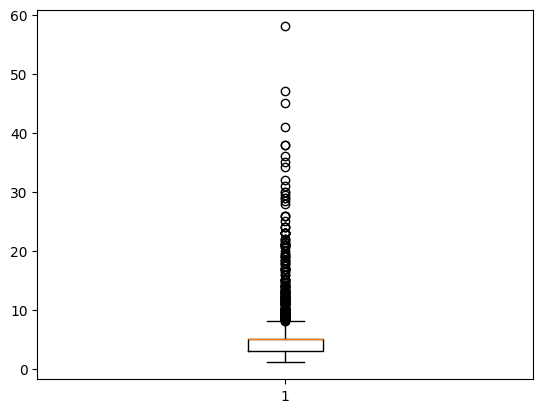

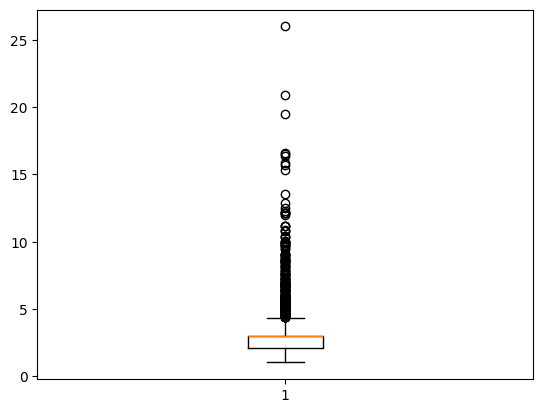

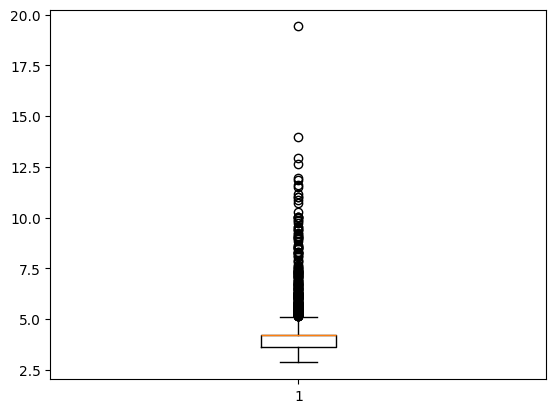

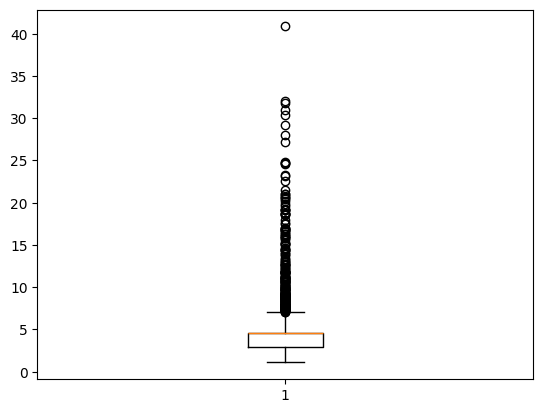

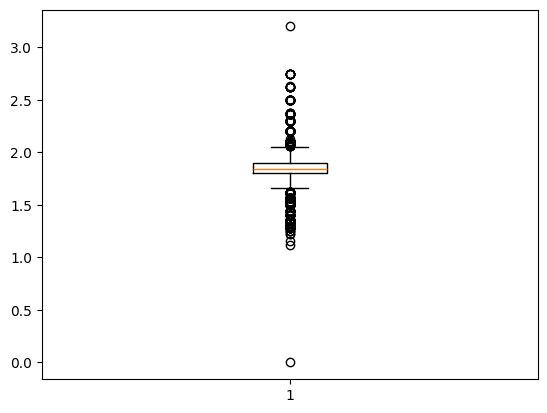

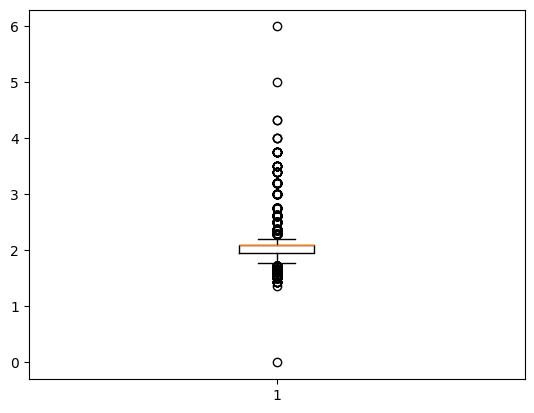

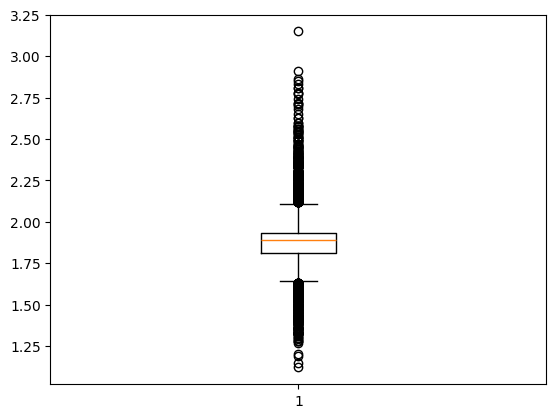

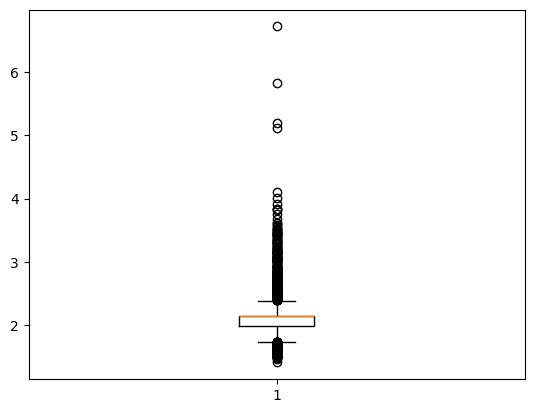

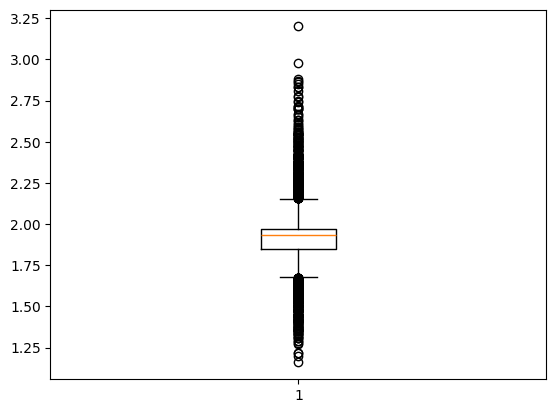

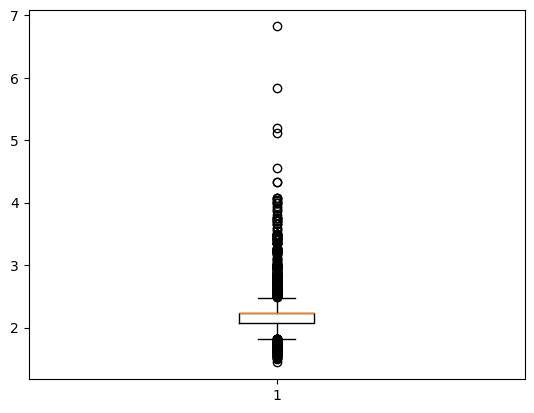

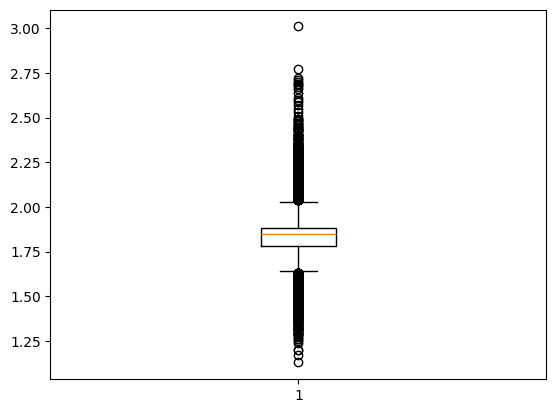

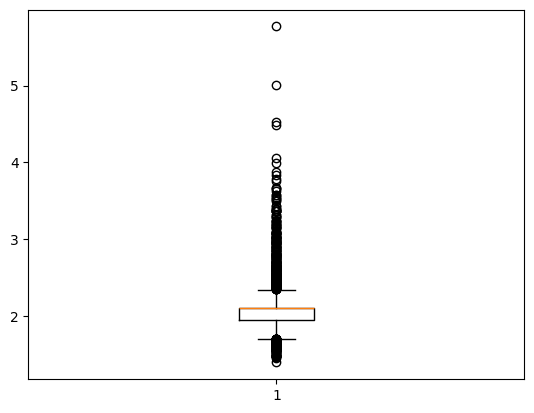

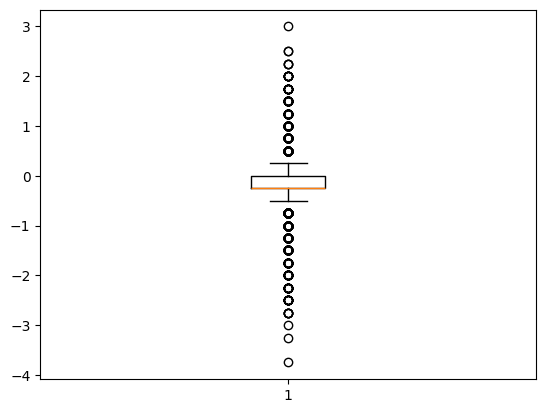

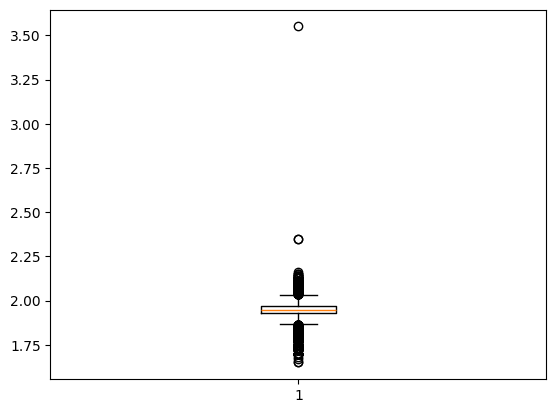

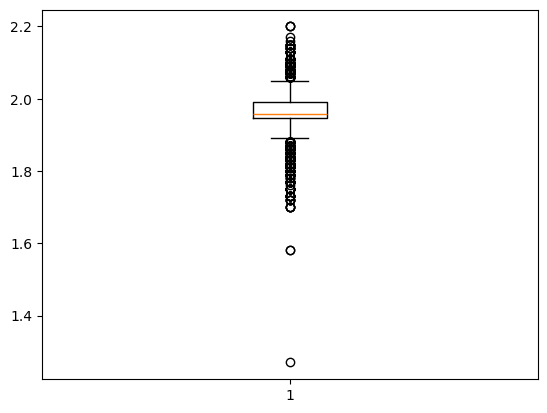

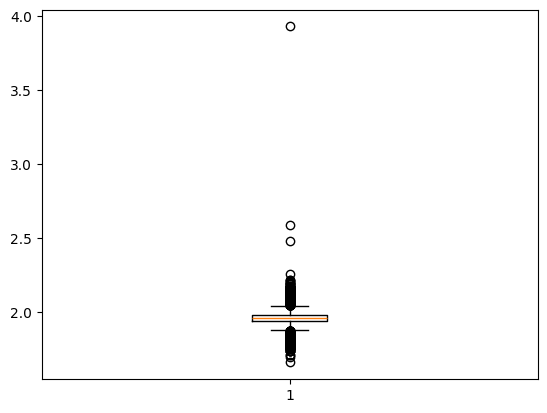

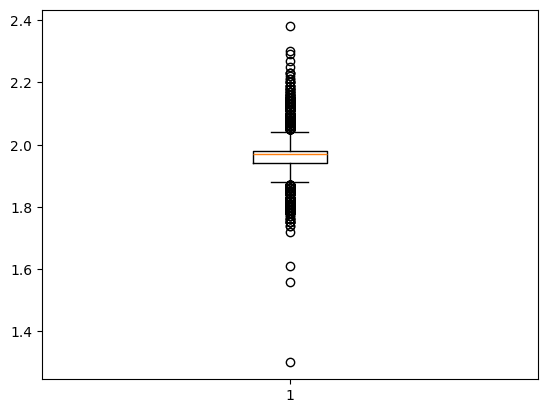

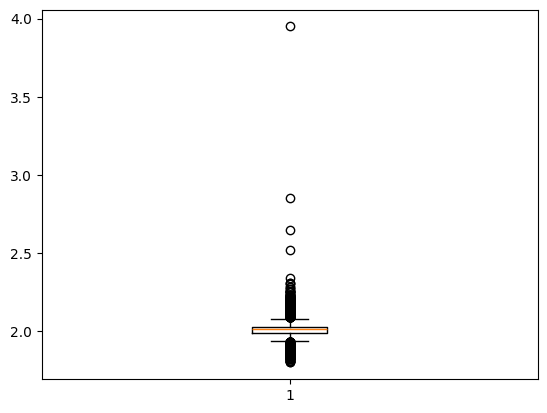

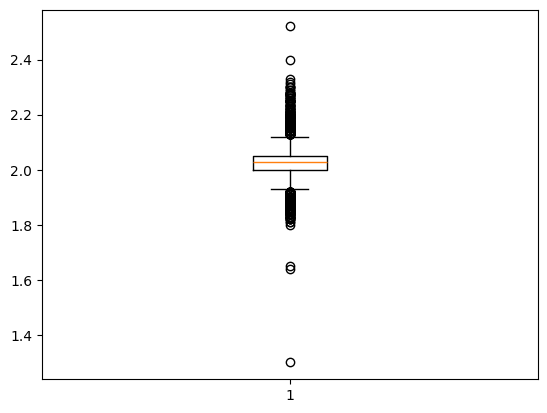

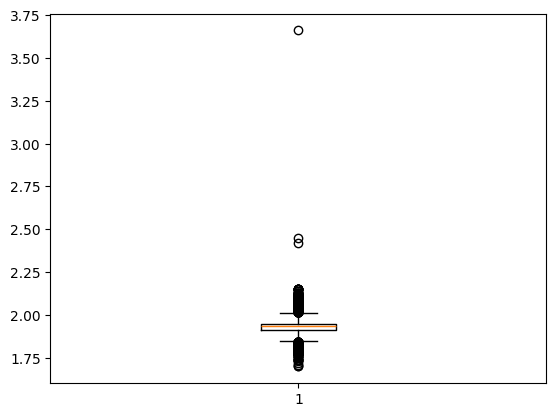

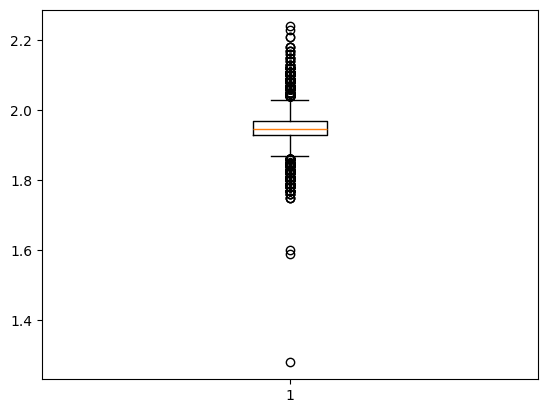

In [9]:
for column in df.columns:
     # Create a box plot using Matplotlib
    plt.boxplot(df[column])
    # # Show the plot
    plt.show()